Employee Turnover Prediction project is to construct an accurate predictive model that anticipates employee attrition. By analyzing historical employee data, encompassing job satisfaction, salary, work environment, and performance metrics, the model aims to identify employees at risk of leaving the organization. The objective is to provide actionable insights to Human Resources for implementing targeted retention strategies. This involves data preprocessing, feature engineering, and leveraging machine learning to build a robust predictive model, ultimately aiding organizations in reducing turnover rates and enhancing workplace productivity.

## Import Libraries

In [38]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression

##  Undertanding the data



In [40]:
df=pd.read_csv("Employee turnover prediction.csv")

In [41]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [42]:
df.tail()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low
14998,0.37,0.52,2,158,3,0,1,0,support,low


In [43]:
print(df.shape)


(14999, 10)


In [44]:
print(df.columns.values)

['satisfaction_level' 'last_evaluation' 'number_project'
 'average_montly_hours' 'time_spend_company' 'Work_accident' 'left'
 'promotion_last_5years' 'Department' 'salary']


In [45]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


## Check for missing data


In [47]:
df.isnull().any()

satisfaction_level       False
last_evaluation          False
number_project           False
average_montly_hours     False
time_spend_company       False
Work_accident            False
left                     False
promotion_last_5years    False
Department               False
salary                   False
dtype: bool

## Data Visualization:
Distributions of Numerical Features:

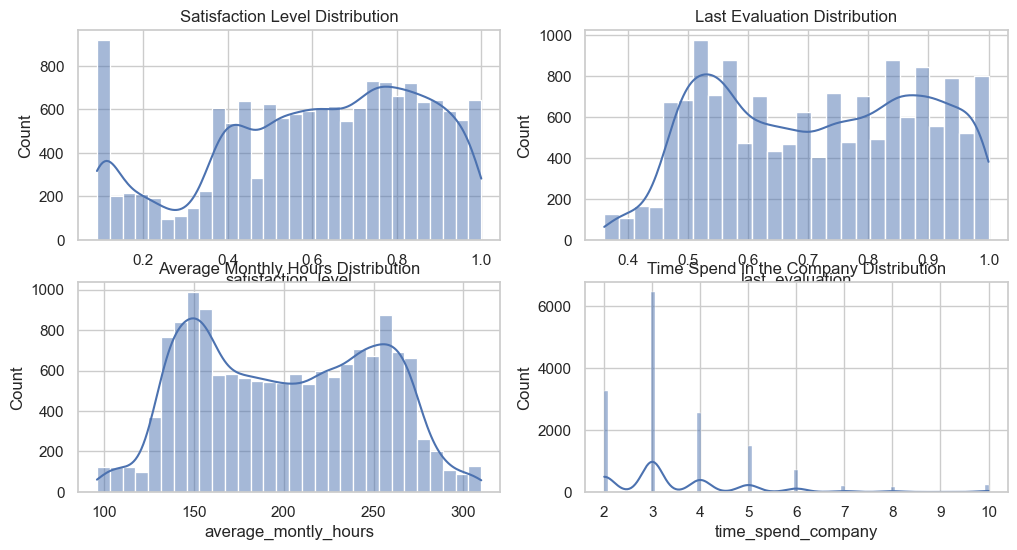

In [48]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
sns.histplot(df['satisfaction_level'], kde=True)
plt.title('Satisfaction Level Distribution')

plt.subplot(2, 2, 2)
sns.histplot(df['last_evaluation'], kde=True)
plt.title('Last Evaluation Distribution')

plt.subplot(2, 2, 3)
sns.histplot(df['average_montly_hours'], kde=True)
plt.title('Average Monthly Hours Distribution')

plt.subplot(2, 2, 4)
sns.histplot(df['time_spend_company'], kde=True)
plt.title('Time Spend in the Company Distribution')

plt.show()


## Categorical Features

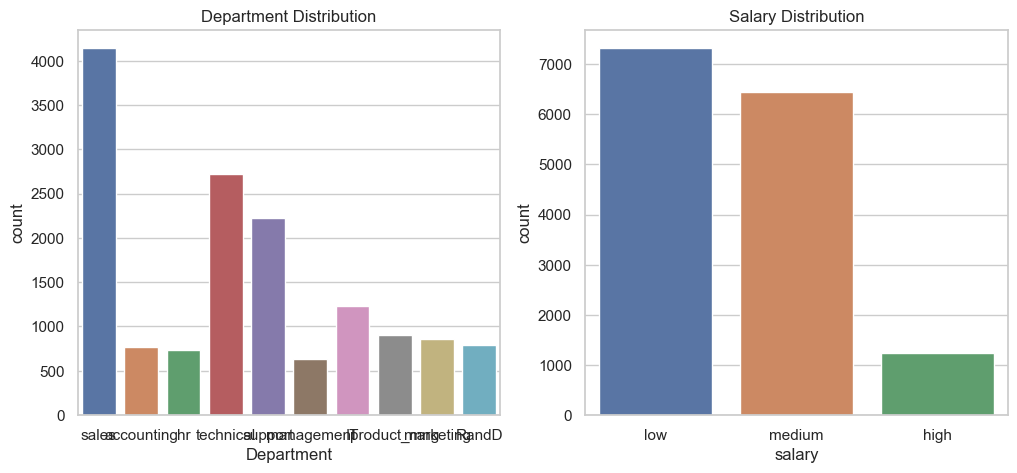

In [49]:

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.countplot(data=df, x='Department')
plt.title('Department Distribution')

plt.subplot(1, 2, 2)
sns.countplot(data=df, x='salary')
plt.title('Salary Distribution')

plt.show()


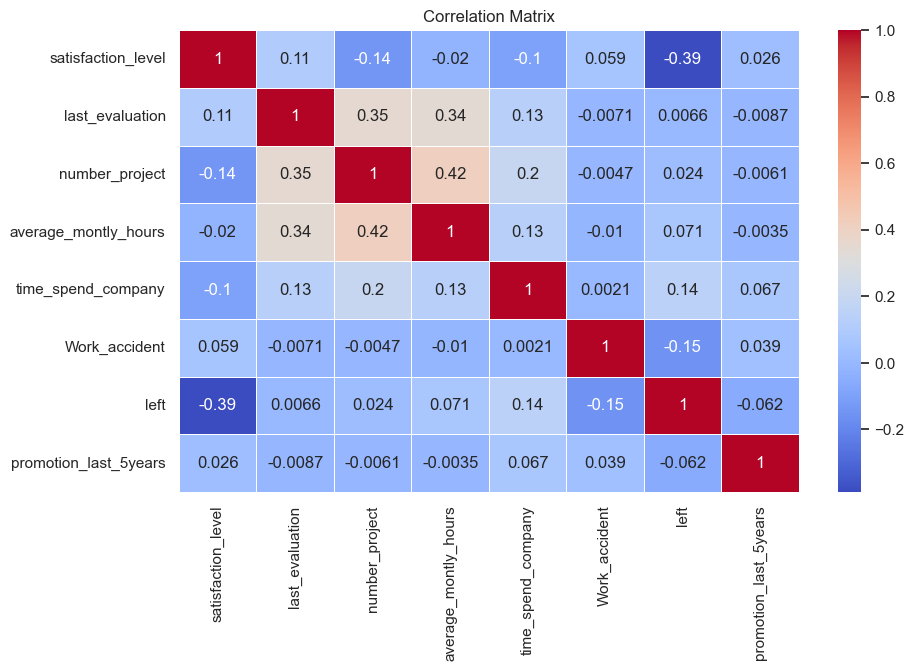

In [50]:
# Exclude non-numeric columns before calculating the correlation
numeric_df = df.select_dtypes(include=[float, int])

correlation_matrix = numeric_df.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


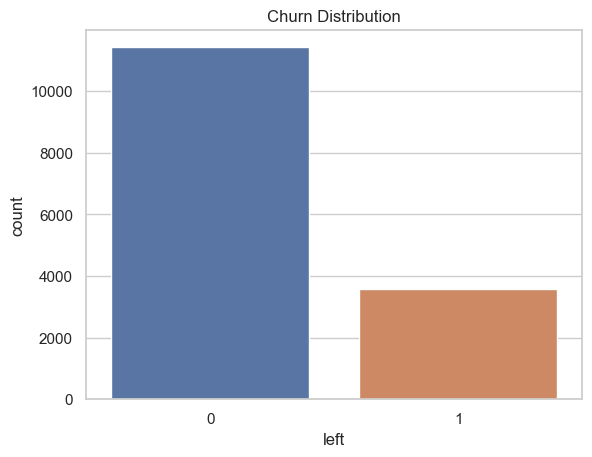

In [51]:
#Churn Distribution
sns.countplot(data=df, x='left')
plt.title('Churn Distribution')
plt.show()


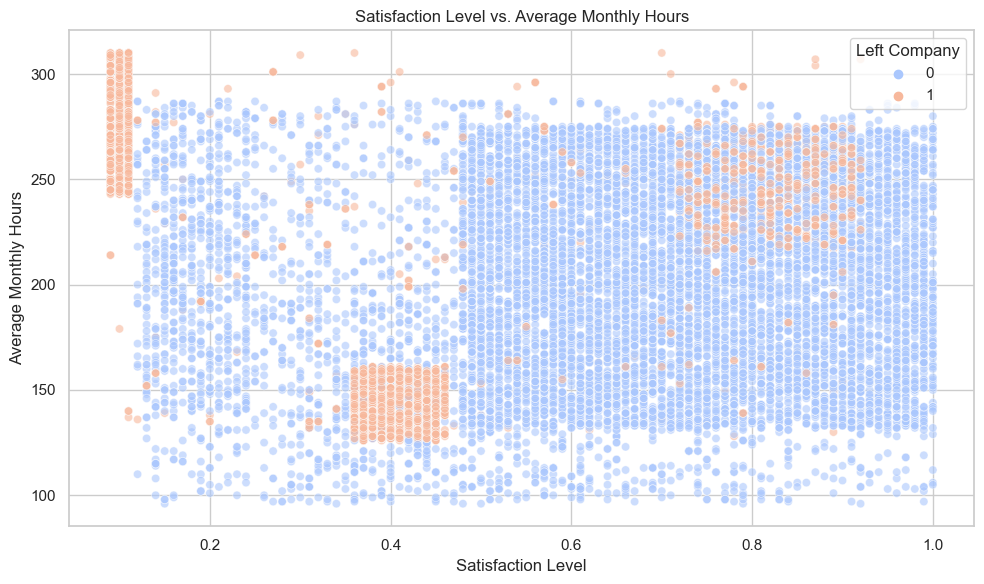

In [52]:
# Scatterplot to visualize the relationship between satisfaction level and average monthly hours
plt.figure(figsize=(10, 6))
sns.scatterplot(x='satisfaction_level', y='average_montly_hours', data=df, hue='left', palette='coolwarm', alpha=0.6)
plt.title('Satisfaction Level vs. Average Monthly Hours')
plt.xlabel('Satisfaction Level')
plt.ylabel('Average Monthly Hours')
plt.legend(title='Left Company')
plt.tight_layout()
plt.show()

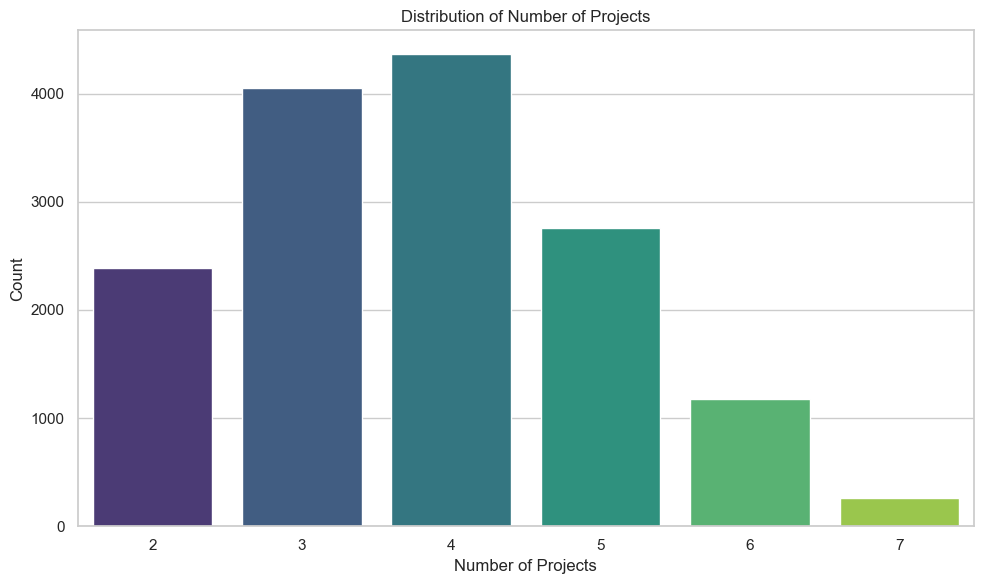

In [53]:
# Visualize the distribution of the number of projects
f, ax = plt.subplots(figsize=(10, 6))
sns.countplot(x='number_project', data=df, palette='viridis', ax=ax)
ax.set_title('Distribution of Number of Projects')
ax.set_xlabel('Number of Projects')
ax.set_ylabel('Count')
plt.tight_layout()
plt.show()

## Split the data

In [54]:
# Split the data into features (X) and the target variable (y)
X = df.drop('left', axis=1)
y = df['left']

## Data Preprocessing

In [55]:
# Encode categorical variables (e.g., 'Department' and 'salary') using one-hot encoding
X = pd.get_dummies(X, columns=['Department', 'salary'], drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


## Model Selection and Training

### Random Forest

In [56]:
# Create and train the Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [57]:
# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate accuracy and generate a classification report
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(classification_rep)


Accuracy: 0.9871111111111112
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3428
           1       0.99      0.96      0.97      1072

    accuracy                           0.99      4500
   macro avg       0.99      0.98      0.98      4500
weighted avg       0.99      0.99      0.99      4500



In [58]:
# Get feature importances from the trained model
feature_importances = model.feature_importances_

# Create a DataFrame to display feature importances
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
print(importance_df)


                   Feature  Importance
0       satisfaction_level    0.323722
4       time_spend_company    0.186657
2           number_project    0.180952
3     average_montly_hours    0.145454
1          last_evaluation    0.123060
5            Work_accident    0.008885
16              salary_low    0.006940
17           salary_medium    0.003964
15    Department_technical    0.003620
13        Department_sales    0.003289
14      Department_support    0.002238
7         Department_RandD    0.002019
10   Department_management    0.001766
9            Department_hr    0.001699
8    Department_accounting    0.001672
6    promotion_last_5years    0.001562
11    Department_marketing    0.001273
12  Department_product_mng    0.001226


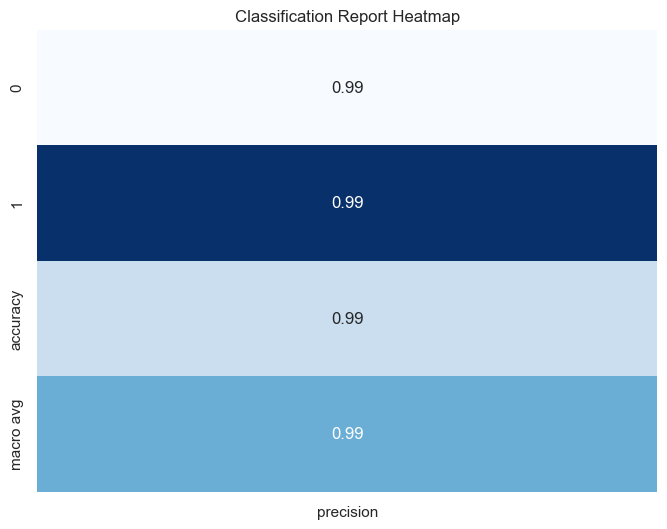

In [59]:
# Generate the classification report as a dictionary
classification_dict = classification_report(y_test, y_pred, output_dict=True)

# Convert the dictionary to a DataFrame for visualization
classification_df = pd.DataFrame(classification_dict).T

# Create a heatmap for visualization
plt.figure(figsize=(8, 6))
sns.heatmap(classification_df.iloc[:-1, :-3], annot=True, cmap='Blues', cbar=False)
plt.title('Classification Report Heatmap')
plt.show()

### Support Vector Machines


In [60]:
# Create and train the SVM classifier
model = SVC(kernel='linear', C=1)  # Linear SVM with regularization parameter C
model.fit(X_train, y_train)


SVC(C=1, kernel='linear')

In [61]:
# Make predictions on the test data
y_pred = model.predict(X_test)

In [62]:
# Calculate accuracy and generate a classification report
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(classification_rep)

Accuracy: 0.7717777777777778
              precision    recall  f1-score   support

           0       0.80      0.94      0.86      3428
           1       0.55      0.24      0.34      1072

    accuracy                           0.77      4500
   macro avg       0.67      0.59      0.60      4500
weighted avg       0.74      0.77      0.74      4500



## Logistic Regression

In [63]:
# Initialize the Logistic Regression classifier
logreg_classifier = LogisticRegression(random_state=42)

# Train the classifier
logreg_classifier.fit(X_train, y_train)

D:\Anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [64]:
# Predict on the testing set
y_pred_logreg = logreg_classifier.predict(X_test)

In [65]:
# Calculate the accuracy
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)

In [66]:
# Generate a classification report
report_logreg = classification_report(y_test, y_pred_logreg)


In [67]:

# Display the accuracy and the classification report
print(accuracy_logreg) 
print(report_logreg)

0.7895555555555556
              precision    recall  f1-score   support

           0       0.82      0.93      0.87      3428
           1       0.60      0.35      0.44      1072

    accuracy                           0.79      4500
   macro avg       0.71      0.64      0.66      4500
weighted avg       0.77      0.79      0.77      4500

